**ASSIGNMENT 3**

In [26]:
# Import necessary libraries
import numpy as np  
import matplotlib.pyplot as plt  

**Q1**


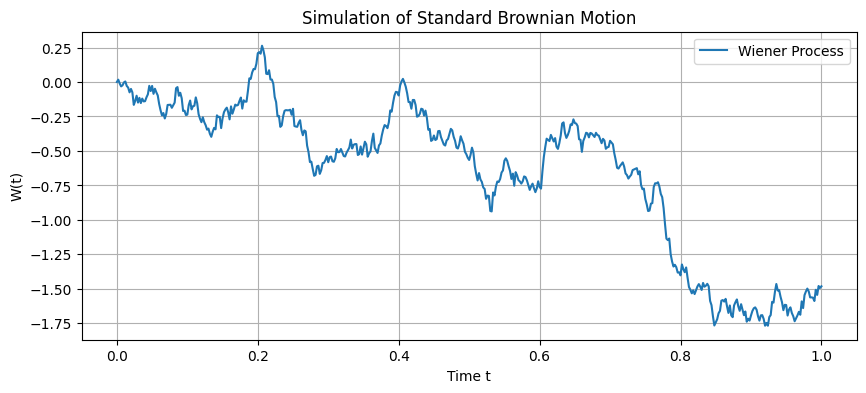

In [27]:
# Parameters for the simulation
T = 1.0          
N = 500          
dt = T / N       
t = np.linspace(0, T, N+1)  # Create a time grid: [0, dt, 2*dt, ..., T]

# Generate a Wiener Process (Standard Brownian Motion)
# Initialize the Wiener process array with zeros
# W[0] = 0 (Brownian motion starts at 0)
W = np.zeros(N+1)  

# Generate random increments (dW) for each time step
# Each increment is normally distributed with mean 0 and variance dt (so std = sqrt(dt))
dW = np.random.normal(0, np.sqrt(dt), size=N)  # N random increments ~ N(0, dt)

# Compute the Wiener process path by taking the cumulative sum of the increments
# W[1] = W[0] + dW[0], W[2] = W[1] + dW[1], ..., W[N] = W[N-1] + dW[N-1]
W[1:] = np.cumsum(dW)  

# Plot the simulated Wiener Process

plt.figure(figsize=(10, 4))  
plt.plot(t, W, label='Wiener Process')  
plt.title('Simulation of Standard Brownian Motion')  
plt.xlabel('Time t') 
plt.ylabel('W(t)')   
plt.grid(True)        
plt.legend()          
plt.show()            

**Q2**

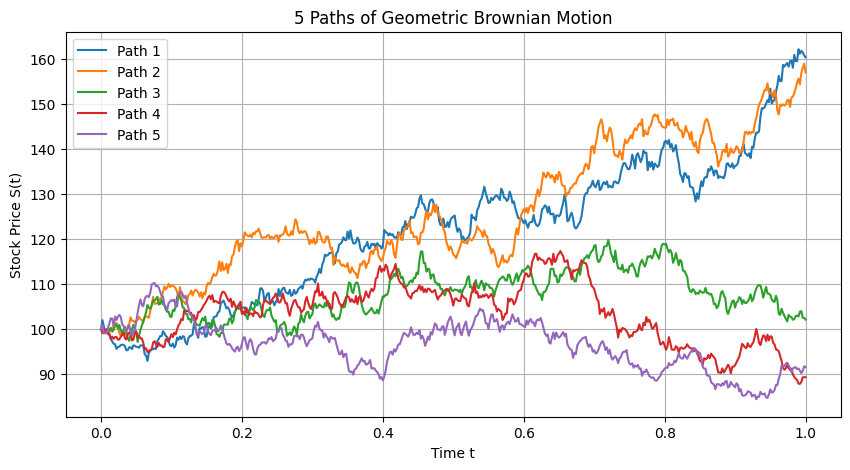

In [28]:
# Parameters for the simulation
T = 1.0            
N = 500            
dt = T / N         
t = np.linspace(0, T, N+1)  # Time grid: [0, dt, 2*dt, ..., T]

# Stock price parameters
S0 = 100           
alpha = 0.05       # Drift coefficient (mean growth rate)
sigma = 0.2        # Volatility (standard deviation of returns)
n_paths = 5        # Number of GBM paths to simulate

# Simulate Geometric Brownian Motion (GBM)
# Initialize a matrix to store all simulated paths
# Shape: (n_paths, N+1) - Each row is one GBM path
paths = np.zeros((n_paths, N+1))

# Simulate each path
for i in range(n_paths):
    # Generate a Wiener process (Brownian motion)
    W = np.zeros(N+1)  # Initialize W(0) = 0
    dW = np.random.normal(0, np.sqrt(dt), size=N)  # Random increments ~ N(0, dt)
    W[1:] = np.cumsum(dW)  # Cumulative sum gives Brownian motion path

    # Apply the GBM formula
    # S(t) = S0 * exp( (α - 0.5σ²)t + σW(t) )
    exponent = (alpha - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(exponent)
    paths[i] = S  # Store this path in the matrix


# Plot all simulated GBM paths

plt.figure(figsize=(10, 5))  # Set figure size
for i in range(n_paths):
    plt.plot(t, paths[i], label=f'Path {i+1}')  # Plot each path

plt.title('5 Paths of Geometric Brownian Motion')
plt.xlabel('Time t')
plt.ylabel('Stock Price S(t)')
plt.grid(True)  
plt.legend()    
plt.show()      

**Q3**

In [29]:
# Set up time parameters
total_time = 1.0
num_steps = 500
time_step = total_time / num_steps

# Choose two time points (30% and 60% through the period)
s_point = int(0.3 * num_steps)
t_point = int(0.6 * num_steps)
s_time = s_point * time_step
t_time = t_point * time_step

# Simulate Brownian motion paths
num_paths = 100000

# Generate all random steps at once
random_steps = np.random.normal(0, np.sqrt(time_step), 
                              size=(num_paths, num_steps))

# Build paths by cumulative sum (each row is one path)
paths = np.cumsum(random_steps, axis=1)

# Add initial zero position
paths = np.hstack([np.zeros((num_paths, 1)), paths])

# Calculate increments between our two time points
increments = paths[:, t_point] - paths[:, s_point]

# Analyze results
mean_increment = np.mean(increments)
variance_increment = np.var(increments)
expected_variance = t_time - s_time

print("\nBrownian Motion Increment Analysis:")
print(f"Time interval: [{s_time:}, {t_time:}]")
print(f"Average increment: {mean_increment:} (should be near 0)")
print(f"Variance of increments: {variance_increment:}")
print(f"Theoretical variance: {expected_variance:}")

# Independence check for non-overlapping intervals
interval1_start = int(0.1 * num_steps)
interval1_end = int(0.2 * num_steps)
interval2_start = int(0.7 * num_steps)
interval2_end = int(0.8 * num_steps)

# Calculate increments for both intervals
inc1 = paths[:, interval1_end] - paths[:, interval1_start]
inc2 = paths[:, interval2_end] - paths[:, interval2_start]

# Check correlation
corr = np.corrcoef(inc1, inc2)[0, 1]

print("\nIndependence Test:")
print(f"Correlation between separate intervals: {corr:}")
print("(Should be very close to 0 for independence)")


Brownian Motion Increment Analysis:
Time interval: [0.3, 0.6]
Average increment: -0.0006825076939277923 (should be near 0)
Variance of increments: 0.2996367734879923
Theoretical variance: 0.3

Independence Test:
Correlation between separate intervals: -0.0024967739983534137
(Should be very close to 0 for independence)


**Q4**

In [30]:
# Parameters
T = 1.0
N = 500
dt = T / N
n_simulations = 100000

# Define s and t
s_index = int(0.3 * N)
t_index = int(0.6 * N)
s = s_index * dt
t = t_index * dt

# Simulate Brownian motions
dW = np.random.normal(0, np.sqrt(dt), size=(n_simulations, N))
W = np.zeros((n_simulations, N+1))
W[:, 1:] = np.cumsum(dW, axis=1)

# Extract increments
increments = W[:, t_index] - W[:, s_index]

# Estimate mean and variance
mean_est = np.mean(increments)
var_est = np.var(increments)
theory_var = t - s

print(f"Estimated Mean of W(t) - W(s): {mean_est:} (should be ~0)")
print(f"Estimated Variance: {var_est:} (should be ~{theory_var:})")

# Independence test (non-overlapping)
a_index = int(0.1 * N)
b_index = int(0.2 * N)
c_index = int(0.7 * N)
d_index = int(0.8 * N)

X = W[:, b_index] - W[:, a_index]
Y = W[:, d_index] - W[:, c_index]

correlation = np.corrcoef(X, Y)[0, 1]
print(f"Correlation between non-overlapping increments: {correlation:} (should be ~0)")


Estimated Mean of W(t) - W(s): 0.0019260691801329492 (should be ~0)
Estimated Variance: 0.299859464266474 (should be ~0.3)
Correlation between non-overlapping increments: 0.0006792834897474601 (should be ~0)


**Q5**

In [31]:
# Time points
T = 1.0
N = 500
dt = T / N
t_index = int(0.8 * N)
s_index = int(0.5 * N)
s = s_index * dt
t = t_index * dt

# Simulate many Brownian paths
n_simulations = 100000
dW = np.random.normal(0, np.sqrt(dt), size=(n_simulations, N))
W = np.zeros((n_simulations, N+1))
W[:, 1:] = np.cumsum(dW, axis=1)

W_s = W[:, s_index]
W_t = W[:, t_index]

# Estimate E[W_t | W_s] ≈ conditional expectation as E[W_t - W_s] ≈ 0
diffs = W_t - W_s
mean_diff = np.mean(diffs)

print(f"Mean of W_t - W_s ≈ {mean_diff:} (should be ~0)")
print(f"Mean of W_t ≈ {np.mean(W_t):}")
print(f"Mean of W_s ≈ {np.mean(W_s):}")

Mean of W_t - W_s ≈ 0.0010722161347736636 (should be ~0)
Mean of W_t ≈ -0.000429062314858852
Mean of W_s ≈ -0.0015012784496325174
